<a href="https://colab.research.google.com/github/ankit-lnmiit/deeplearning/blob/main/DL_hw1_q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# We start by importing the libraries we'll use today
import numpy as np
import torch
import torchvision

In [2]:
#Downloading Training and Testing data
trainingdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=True,download=True,transform=torchvision.transforms.ToTensor())
testdata = torchvision.datasets.FashionMNIST('./FashionMNIST/',train=False,download=True,transform=torchvision.transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/FashionMNIST/raw



In [3]:
#Created Batches of training and testing data
trainDataLoader = torch.utils.data.DataLoader(trainingdata,batch_size=64,shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata,batch_size=64,shuffle=False)

In [4]:
#Defined our Simple Neural Network with three hidden layers
class LinearReg(torch.nn.Module):
  def __init__(self):
    super(LinearReg, self).__init__()
    #Hidden Layer 1 with 256 neurons
    self.hidden_layer_1 = torch.nn.Linear(784, 256)

    #Hidden Layer 2 with 128 neurons    
    self.hidden_layer_2 = torch.nn.Linear(256, 128)

    #Hidden Layer 3 with 64 neurons    
    self.hidden_layer_3 = torch.nn.Linear(128, 64)

    #Output Layer with 10 Outputs
    self.output = torch.nn.Linear(64, 10)

    #ReLU Activation Function
    self.relu = torch.nn.ReLU()
  
  #Defined the order of layers and activation function
  def forward(self, x):
    x = x.view(-1, 28*28) # Flatten the matrix to linear vector
    x = self.hidden_layer_1(x)
    x = self.relu(x)

    x = self.hidden_layer_2(x)
    x = self.relu(x)

    x = self.hidden_layer_3(x)
    x = self.relu(x)

    x = self.output(x)

    return x

model = LinearReg().cuda() # Step 1: architecture
loss = torch.nn.CrossEntropyLoss() # Step 2: loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Step 3: training method

In [5]:
train_loss_history = []
test_loss_history = []

for epoch in range(20):
  train_loss = 0.0
  test_loss = 0.0
  
  #Enters Training Mode
  model.train()
  for i, data in enumerate(trainDataLoader):
    images, labels = data
    images = images.cuda()
    labels = labels.cuda()
    optimizer.zero_grad() # zero out any gradient values from the previous iteration
    predicted_output = model(images) # forward propagation  
    fit = loss(predicted_output, labels)  # calculate our measure of goodness
    fit.backward() # backpropagation
    optimizer.step() # update the weights of our trainable parameters
    train_loss += fit.item()

#Enters Testing Mode
  model.eval()
  for i, data in enumerate(testDataLoader):
    with torch.no_grad():
      images, labels = data
      images = images.cuda()
      labels = labels.cuda()
      predicted_output = model(images). #prediction
      fit = loss(predicted_output, labels) #calculate loss
      test_loss += fit.item()
  
  train_loss = train_loss / len(trainDataLoader)
  test_loss = test_loss / len(testDataLoader)
  train_loss_history += [train_loss]
  test_loss_history += [test_loss]
  print(f'Epoch {epoch}, Train loss {train_loss}, Test loss {test_loss}')

Epoch 0, Train loss 1.8884791262241314, Test loss 1.092523586977819
Epoch 1, Train loss 0.8494286785946726, Test loss 0.7450333909623942
Epoch 2, Train loss 0.6823033026413623, Test loss 0.6828860192541863
Epoch 3, Train loss 0.6130752345519279, Test loss 0.6297161702517491
Epoch 4, Train loss 0.5682999643244977, Test loss 0.592346929061185
Epoch 5, Train loss 0.5345000206057959, Test loss 0.5692902121953903
Epoch 6, Train loss 0.508235758794015, Test loss 0.5453107711995483
Epoch 7, Train loss 0.48280614401612965, Test loss 0.5832323162419022
Epoch 8, Train loss 0.4619365898785052, Test loss 0.48232323766513996
Epoch 9, Train loss 0.4444745016028124, Test loss 0.4790762421811462
Epoch 10, Train loss 0.4300466591297691, Test loss 0.45438094968628734
Epoch 11, Train loss 0.4159209098357127, Test loss 0.4662493166460353
Epoch 12, Train loss 0.4058307808186454, Test loss 0.4444534834592965
Epoch 13, Train loss 0.3945728596180741, Test loss 0.44306465129184114
Epoch 14, Train loss 0.384910

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

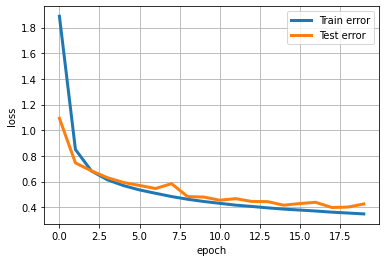

In [7]:
#Plotting Train and test loss
plt.plot(range(20),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(20),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

In [25]:
predicted_outputs = model(images)

<BarContainer object of 10 artists>

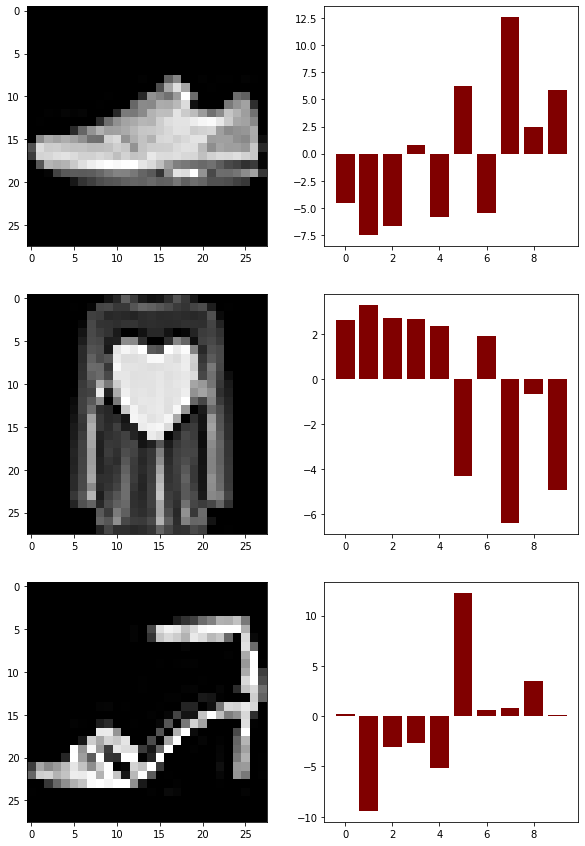

In [26]:
#Plotting three samples along with their probabilities
plt.figure(figsize = (10,15))
plt.subplot(3,2,1)
plt.imshow(images[2].squeeze().cpu(), cmap='gray')

plt.subplot(3,2,2)
plt.bar(range(10),predicted_outputs[2].cpu().detach().numpy(), color ='maroon')

plt.subplot(3,2,3)
plt.imshow(images[1].squeeze().cpu(), cmap='gray')

plt.subplot(3,2,4)
plt.bar(range(10),predicted_outputs[1].cpu().detach().numpy(), color ='maroon')

plt.subplot(3,2,5)
plt.imshow(images[3].squeeze().cpu(), cmap='gray')

plt.subplot(3,2,6)
plt.bar(range(10),predicted_outputs[3].cpu().detach().numpy(), color ='maroon')

